# keras Convolution Neural Networks(CNN) with Hand Written Digits MNIST

In [138]:
from keras.datasets import mnist

In [91]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## Visualizing the Image data

In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
x_train.shape

(60000, 28, 28)

In [94]:
x_test.shape

(10000, 28, 28)

In [95]:
single_image=x_train[0]

In [96]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [97]:
type(single_image)

numpy.ndarray

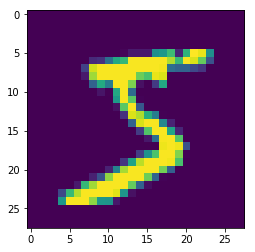

In [98]:
plt.imshow(single_image)

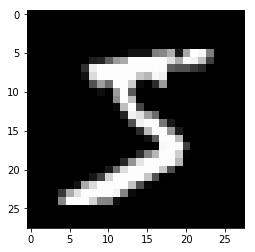

In [99]:
plt.imshow(single_image,cmap='gray')

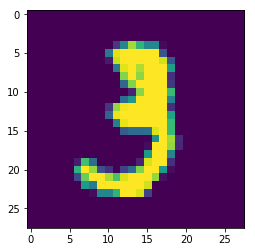

In [100]:
another_image=x_train[10]
plt.imshow(another_image)

## PreProcessing Data

We first need to make sure the labels will be understandable by the <b>CNN</b>

### Labels

In [101]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [102]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis

### One Hot Encoded

In [103]:
from keras.utils.np_utils import to_categorical

In [104]:
y_train.shape

(60000,)

In [105]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [106]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [107]:
y_cat_train.shape

(60000, 10)

In [108]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Processing X Data

In [109]:
single_image.max()

255

In [110]:
single_image.min()

0

In [111]:
x_train=x_train/255
x_test=x_test/255

In [112]:
scaled_single=x_train[0]
scaled_single.max()

1.0

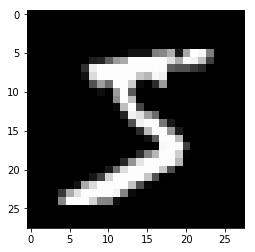

In [113]:
plt.imshow(scaled_single,cmap='gray')

## Reshaping the data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [114]:
x_train.shape

(60000, 28, 28)

In [115]:
x_test.shape

(10000, 28, 28)

In [116]:
x_train=x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [117]:
x_test=x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

## Train the Model

In [118]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [119]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [120]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


#### Fit the model

In [123]:
model.fit(x_train,y_cat_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.1405 - acc: 0.9564
Epoch 2/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.0517 - acc: 0.9844
Epoch 3/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.0360 - acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 38s 629us/step - loss: 0.0280 - acc: 0.99201s - loss: 0.0278 - acc: 0. - ETA: 0s - loss: 0.0280
Epoch 5/10
60000/60000 [==============================] - 37s 620us/step - loss: 0.0214 - acc: 0.9940
Epoch 6/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.0172 - acc: 0.9954
Epoch 7/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.0138 - acc: 0.99610s - loss: 0.0138 - acc: 0.99
Epoch 8/10
60000/60000 [==============================] - 37s 625us/step - loss: 0.0099 - acc: 0.99714s  - ETA: 0s - loss: 0.0100 - acc: 0.
Epoch 9/10
60000/

## Evaluate the model

In [124]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 122us/step


[0.09651275250477738, 0.9853]

In [125]:
prediction=model.predict_classes(x_test)

In [126]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [127]:
prediction[0]

7

In [128]:
y_cat_test[93]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [137]:
prediction[93]

3

### find Accuracy of model

In [134]:
from sklearn.metrics import classification_report,accuracy_score

In [135]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       1.00      0.97      0.99       892
           6       0.98      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [136]:
print(accuracy_score(y_test,prediction))

0.9853
